<h1 style="color: #0000FF; text-align: center"> Airbnb Data Analysis </h1>


## Dataset Information:

Airbnb, Inc., a company based in San Francisco, California, is renowned for its online platform that connects travelers with lodging options, primarily homestays and vacation rentals, along with tourism activities. Established in 2008, Airbnb serves as a facilitator between guests seeking accommodation and hosts offering their properties for rent. Unlike conventional hospitality firms, Airbnb does not own the listed properties; instead, it generates revenue by charging a commission for each booking conducted through its platform.

Since its inception, Airbnb has revolutionized the travel industry by providing a more personalized and distinctive alternative to traditional lodging options. Through its website and mobile app, Airbnb has significantly impacted how people explore and experience destinations. The dataset associated with the Airbnb Inside initiative offers valuable insights into the listing dynamics of homestays within New York City.

## Dataset Columns
Dataset has various columns which are used to provide detailed information about the contents of a dataset or database, such as the names of measured variables, their data types or formats, and text descriptions. A data dictionary provides a concise guide to understanding and using the data.

**id:** Airbnb's unique idfor the listing.

**Name:** Title of the listing.

**host id:** Airbnb's unique identifier for the host/user of the listing.

**host name:** The name of the host.

**neighbourhood group:** The geocoded neighbourhood group based on latitude and longitude.

**neighbourhood:** The neighbourhood where the listing is located.

**latitude:** The latitude coordinate of the listing's location.

**longitude:** The longitude coordinate of the listing's location.

**country:** The country where the listing is located.

**country code:** The country code of the listing's location.

**instant bookable:** Indicates whether the guest can automatically book the listing without the host requiring to accept their booking request (True/False).

**cancellation_policy:** The policy set by the host for cancellations.

**room type:** The type of rooms available (e.g., Entire home/apt, Private room, Shared room, Hotel).

**Construction year:** The year when the property was constructed.

**price:** The daily price of the listing in the local currency.

**service fee:** The additional fee charged for the service.

**minimum nights:** The minimum number of nights required for booking the listing.

**number of reviews:** The total number of reviews the listing has received.

**last_review:** The date of the last/newest review.

**reviews per month:** The number of reviews the listing has over the lifetime of the listin

**availability_365:** The availability of the listing next 365 days in the future as determined by the calendar.

**house rules:** The rules set by the host for guests staying at the listing.

**license:** The license/permit/registration number associated with the listing of Airbnb.


In [14]:
### Importing Necessary libraries of python such as pandas, numpy, matplotlib, datetime etc for Data Analysis.

import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from colorama import Fore, Style

%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [15]:
data = pd.read_csv("C:\Sudhanshu_Sharma\Learning\Dataset\Jupyter\Practice\Datasets\Airbnb_Open_Data.csv")
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [16]:
# Dimensions of Dataset
print(f'{Fore.BLUE}Dimension of Dataset is: {Style.RESET_ALL}{data.shape}')


Dimension of Dataset is: (102599, 26)


In [17]:
## Overview of Data
print(f"{Fore.BLUE} Basic Overview of Dataset: \n {Style.RESET_ALL}")
data.info()

 Basic Overview of Dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null

Data Cleaning


In [18]:
### Finding data type, Number of Unique Values, Number of Null vales, Percetage of Null values, Mean and Median for all columns

def checking_func(data):
    check_data = []
    columns = data.columns
    for col in columns:
        #data Type
        data_types = data[col].dtypes
        #Number of Unique Values
        num_unique_values = data[col].nunique()
        # Number of Null Values
        sum_null_values = data[col].isnull().sum()
        #Null Percentage Values
        null_percentage = (sum_null_values * 100 / len(data))
        ## Mean
        mean_values = data[col].mean() if data[col].dtypes != 'object' else 'NA'
        ## Median
        median_values = data[col].median() if data[col].dtypes != 'object' else 'NA'
        ## Appending the values of above functions
        check_data.append([col,data_types,num_unique_values,sum_null_values,null_percentage, mean_values,median_values])
    
    ## Converting to DataFrame
    data_check = pd.DataFrame(check_data)
    data_check.columns = ['columns','data_types','num_unique_values','sum_null_values','null_percentage','mean_values','median_values']
    
    ## Sorting By Null Percentage Column
    data_check.sort_values(by='null_percentage', ascending= False, inplace = True) 

     # Grouping by Data Types
    data_grouped = data_check.groupby('data_types').apply(lambda x: x.reset_index(drop=True))
    
    return data_grouped


checking_func(data)

columns data_types  num_unique_values  \
data_types                                                                    
int64      0                               id      int64             102058   
           1                          host id      int64             102057   
float64    0                reviews per month    float64               1016   
           1                 availability 365    float64                438   
           2                   minimum nights    float64                153   
           3               review rate number    float64                  5   
           4   calculated host listings count    float64                 78   
           5                Construction year    float64                 20   
           6                number of reviews    float64                476   
           7                             long    float64              17774   
           8                              lat    float64              21991   
object     0                          license     object                  1   
           1                      house_rules     object               1976   
           2                      last review     object               2477   
           3                          country     object                  1   
           4                        host name     object              13190   
           5           host_identity_verified     object                  2   
           6                      service fee     object                231   
           7                             NAME     object              61281   
           8                            price     object               1151   
           9                     country code     object                  1   
           10                instant_bookable     object                  2   
           11             cancellation_policy     object                  3   
           12             neighbourhood group     object                  7   
           13                   neighbourhood     object                224   
           14                       room type     object                  4   

               sum_null_values  null_percentage         mean_values  \
data_types                                                            
int64      0                 0         0.000000      29146234.52213   
           1                 0         0.000000  49254111474.328667   
float64    0             15879        15.476759            1.374022   
           1               448         0.436651          141.133254   
           2               409         0.398639            8.135845   
           3               326         0.317742            3.279106   
           4               319         0.310919            7.936605   
           5               214         0.208579         2012.487464   
           6               183         0.178364           27.483743   
           7                 8         0.007797          -73.949644   
           8                 8         0.007797           40.728094   
object     0            102597        99.998051                  NA   
           1             52131        50.810437                  NA   
           2             15893        15.490404                  NA   
           3               532         0.518524                  NA   
           4               406         0.395715                  NA   
           5               289         0.281679                  NA   
           6               273         0.266084                  NA   
           7               250         0.243667                  NA   
           8               247         0.240743                  NA   
           9               131         0.127682                  NA   
           10              105         0.102340                  NA   
           11               76         0.074075                  NA   
           12               29         0.028265   

In [19]:
## Replacing the Unwanted Symbols from Dataset

#Remove all dollar, Commas signs in the price and service fee columns
data['price'] = data['price'].str.replace('$','',  regex= False)
data['service fee'] = data['service fee'].str.replace('$','',  regex= False)

data['price'] = data['price'].str.replace(',','',  regex= False)
data['service fee'] = data['service fee'].str.replace(',','',  regex= False)

In [20]:
#Changed mismatched data types to the appropriate once.
data['price'] = data['price'].astype(float)
data['service fee'] = data['service fee'].astype(float)



In [21]:
#By Looking the percentage values of Null we will Columns which will not be requiring for Data Analysis
data.drop(['id', 'license','host id','country','lat','long', 'country code','last review','house_rules'], axis = 1,inplace  = True)


In [22]:
# After Dropping Columns

print(f"{Fore.BLUE} List of Columns after Dropping some Columns: \n{Style.RESET_ALL}{data.columns}")

 List of Columns after Dropping some Columns: 
Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')


In [23]:
### Finding data type, Number of Unique Values, Number of Null vales, Percetage of Null values, Mean and Median for all columns

def checking_func(data):
    check_data = []
    columns = data.columns
    for col in columns:
        #data Type
        data_types = data[col].dtypes
        #Number of Unique Values
        num_unique_values = data[col].nunique()
        # Number of Null Values
        sum_null_values = data[col].isnull().sum()
        #Null Percentage Values
        null_percentage = (sum_null_values * 100 / len(data))
        ## Mean
        mean_values = data[col].mean() if data[col].dtypes != 'object' else 'NA'
        ## Median
        median_values = data[col].median() if data[col].dtypes != 'object' else 'NA'
        ## Appending the values of above functions
        check_data.append([col,data_types,num_unique_values,sum_null_values,null_percentage, mean_values,median_values])
    
    ## Converting to DataFrame
    data_check = pd.DataFrame(check_data)
    data_check.columns = ['columns','data_types','num_unique_values','sum_null_values','null_percentage','mean_values','median_values']
    
    ## Sorting By Null Percentage Column
    data_check.sort_values(by='null_percentage', ascending= False, inplace = True) 

     # Grouping by Data Types
    data_grouped = data_check.groupby('data_types').apply(lambda x: x.reset_index(drop=True))
    
    return data_grouped


checking_func(data)

columns data_types  num_unique_values  \
data_types                                                                   
float64    0               reviews per month    float64               1016   
           1                availability 365    float64                438   
           2                  minimum nights    float64                153   
           3              review rate number    float64                  5   
           4  calculated host listings count    float64                 78   
           5                     service fee    float64                231   
           6                           price    float64               1151   
           7               Construction year    float64                 20   
           8               number of reviews    float64                476   
object     0                       host name     object              13190   
           1          host_identity_verified     object                  2   
           2                            NAME     object              61281   
           3                instant_bookable     object                  2   
           4             cancellation_policy     object                  3   
           5             neighbourhood group     object                  7   
           6                   neighbourhood     object                224   
           7                       room type     object                  4   

              sum_null_values  null_percentage  mean_values median_values  
data_types                                                                 
float64    0            15879        15.476759     1.374022          0.74  
           1              448         0.436651   141.133254          96.0  
           2              409         0.398639     8.135845           3.0  
           3              326         0.317742     3.279106           3.0  
           4              319         0.310919     7.936605           1.0  
           5              273         0.266084   125.026924         125.0  
           6              247         0.240743   625.293536         624.0  
           7              214         0.208579  2012.487464        2012.0  
           8              183         0.178364    27.483743           7.0  
object     0              406         0.395715           NA            NA  
           1              289         0.281679           NA            NA  
           2              250         0.243667           NA            NA  
           3              105         0.102340           NA            NA  
           4               76         0.074075           NA            NA  
           5               29         0.028265           NA            NA  
           6               16         0.015595           NA            NA  
           7                0         0.000000           NA            NA

In [24]:
# Function to clean column names
def clean_column_name(col):
    # Replace spaces with underscores
    return col.strip().lower().replace(' ', '_')

# Rename columns using the clean_column_name function
data.rename(columns=clean_column_name, inplace=True)

In [25]:
# Printing Unique Values of Columns
print(f"{Fore.BLUE} Unique Values in Host Identity Verified Column: {Style.RESET_ALL}{data['host_identity_verified'].unique()}")
print(f"{Fore.BLUE} Unique Values in Type of Rooms Column: {Style.RESET_ALL}{data['room_type'].unique()}")
print(f"{Fore.BLUE} Unique Values in Cancellation Policy Column: {Style.RESET_ALL}{data['cancellation_policy'].unique()}")
print(f"{Fore.BLUE} Unique Values in Instant_Bookable Column: {Style.RESET_ALL}{data['instant_bookable'].unique()}")
print(f"{Fore.BLUE} Unique Values in Neighbourhood Group Column: {Style.RESET_ALL}{data['neighbourhood_group'].unique()}")


 Unique Values in Host Identity Verified Column: ['unconfirmed' 'verified' nan]
 Unique Values in Type of Rooms Column: ['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']
 Unique Values in Cancellation Policy Column: ['strict' 'moderate' 'flexible' nan]
 Unique Values in Instant_Bookable Column: [False True nan]
 Unique Values in Neighbourhood Group Column: ['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']


In [26]:
## Filling NUll Values
for i in data.columns:
    if data[i].dtype == 'object':
        data[i].fillna('Unknown', inplace = True) ## Adding Missing values in Object Data Type Columns
    else:
        data[i].fillna(data[i].median(),inplace=True) ## Adding Median values in Floating Data Type Columns

In [27]:
# Change all mismatched data types to the appropriate once.
# Remove extra whitespace from column names
data.columns = data.columns.str.strip()

# Now try to convert the column to datetime
data['construction_year'] = data['construction_year'].astype(int)

#Correct the Spelling of 'brookln' to 'Brooklyn'

corrections = {
    'brookln': 'Brooklyn',
    'manhatan': 'Manhattan',
    'Staten Island': 'State Island'
}
data['neighbourhood_group'] = data['neighbourhood_group'].replace(corrections)

In [28]:
# Printing Unique Values of Columns after filling Nan Values with Unknown
print(f"{Fore.BLUE} Unique Values in Host Identity Verified Column: {Style.RESET_ALL}{data['host_identity_verified'].unique()}")
print(f"{Fore.BLUE} Unique Values in Type of Rooms Column: {Style.RESET_ALL}{data['room_type'].unique()}")
print(f"{Fore.BLUE} Unique Values in Cancellation Policy Column: {Style.RESET_ALL}{data['cancellation_policy'].unique()}")
print(f"{Fore.BLUE} Unique Values in Instant_Bookable Column: {Style.RESET_ALL}{data['instant_bookable'].unique()}")
print(f"{Fore.BLUE} Unique Values in Neighbourhood Group Column: {Style.RESET_ALL}{data['neighbourhood_group'].unique()}")


 Unique Values in Host Identity Verified Column: ['unconfirmed' 'verified' 'Unknown']
 Unique Values in Type of Rooms Column: ['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']
 Unique Values in Cancellation Policy Column: ['strict' 'moderate' 'flexible' 'Unknown']
 Unique Values in Instant_Bookable Column: [False True 'Unknown']
 Unique Values in Neighbourhood Group Column: ['Brooklyn' 'Manhattan' 'Queens' 'Unknown' 'State Island' 'Bronx']


Finding the Number of Duplicate values

In [29]:
#Finding Duplicate Values in Dataset
num_duplicates = data.duplicated().sum()

if num_duplicates > 0:
    print(f"{Fore.BLUE} Number of Duplicate values present in Dataset is: {Style.RESET_ALL}{num_duplicates}")
else: 
    print(f"{Fore.BLUE} No Duplicate Values Present: {Style.RESET_ALL}")  

## Number of Records before dropping the Duplicate
print(f"{Fore.BLUE} Number of rows present in Dataset: {Style.RESET_ALL}{len(data)}")
data.drop_duplicates(inplace= True)
## Number of Records after dropping the Duplicate
print(f"{Fore.BLUE} Number of rows present in Dataset after dropping duplicate values in Dataset: {Style.RESET_ALL}{len(data)}")


 Number of Duplicate values present in Dataset is: 3624
 Number of rows present in Dataset: 102599
 Number of rows present in Dataset after dropping duplicate values in Dataset: 98975


In [30]:
# Renaming Price and Service Columns
data.rename(columns={
    'price': 'price_in_$',
    'service_fee': 'service_fee_in_$'
}, inplace=True)
data.head()

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,instant_bookable,cancellation_policy,room_type,construction_year,price_in_$,service_fee_in_$,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
2,THE VILLAGE OF HARLEM....NEW YORK !,Unknown,Elise,Manhattan,Harlem,True,flexible,Private room,2005,620.0,124.0,3.0,0.0,0.74,5.0,1.0,352.0
3,Unknown,unconfirmed,Garry,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005,368.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0


In [31]:
## Checking of any Null values are present after Cleaning

def checking_func(data):
    check_data = []
    columns = data.columns
    for col in columns:
        #data Type
        data_types = data[col].dtypes
        #Number of Unique Values
        num_unique_values = data[col].nunique()
        # Number of Null Values
        sum_null_values = data[col].isnull().sum()
        #Null Percentage Values
        null_percentage = (sum_null_values * 100 / len(data))
        ## Mean
        mean_values = data[col].mean() if data[col].dtypes != 'object' else 'NA'
        ## Median
        median_values = data[col].median() if data[col].dtypes != 'object' else 'NA'
        ## Appending the values of above functions
        check_data.append([col,data_types,num_unique_values,sum_null_values,null_percentage, mean_values,median_values])
    
    ## Converting to DataFrame
    data_check = pd.DataFrame(check_data)
    data_check.columns = ['columns','data_types','num_unique_values','sum_null_values','null_percentage','mean_values','median_values']
    
    ## Sorting By Null Percentage Column
    data_check.sort_values(by='null_percentage', ascending= False, inplace = True) 

     # Grouping by Data Types
    data_grouped = data_check.groupby('data_types').apply(lambda x: x.reset_index(drop=True))
    
    return data_grouped


checking_func(data)

columns data_types  num_unique_values  \
data_types                                                                   
int32      0               construction_year      int32                 20   
float64    0                      price_in_$    float64               1151   
           1  calculated_host_listings_count    float64                 78   
           2              review_rate_number    float64                  5   
           3               reviews_per_month    float64               1016   
           4               number_of_reviews    float64                476   
           5                  minimum_nights    float64                153   
           6                service_fee_in_$    float64                231   
           7                availability_365    float64                438   
object     0                            name     object              61282   
           1          host_identity_verified     object                  3   
           2                       room_type     object                  4   
           3             cancellation_policy     object                  4   
           4                instant_bookable     object                  3   
           5                   neighbourhood     object                225   
           6             neighbourhood_group     object                  6   
           7                       host_name     object              13191   

              sum_null_values  null_percentage  mean_values median_values  
data_types                                                                 
int32      0                0              0.0  2012.487679        2012.0  
float64    0                0              0.0   625.292912         624.0  
           1                0              0.0     7.969608           1.0  
           2                0              0.0     3.281495           3.0  
           3                0              0.0     1.277075          0.74  
           4                0              0.0    27.549331           7.0  
           5                0              0.0     8.146997           3.0  
           6                0              0.0    125.02631         125.0  
           7                0              0.0   141.834958          97.0  
object     0                0              0.0           NA            NA  
           1                0              0.0           NA            NA  
           2                0              0.0           NA            NA  
           3                0              0.0           NA            NA  
           4                0              0.0           NA            NA  
           5                0              0.0           NA            NA  
           6                0              0.0           NA            NA  
           7                0              0.0           NA            NA

Expolatory Data Analysis EDA

In [32]:
# Summary Of Dataset
print(f"{Fore.BLUE} Summary of Dataset after Data cleaning: \n {Style.RESET_ALL}")
data.describe()

 Summary of Dataset after Data cleaning: 
 


,construction_year,price_in_$,service_fee_in_$,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,98975.000000,98975.000000,98975.000000,98975.000000,98975.000000,98975.000000,98975.000000,98975.000000,98975.000000
mean,2012.487679,625.292912,125.026310,8.146997,27.549331,1.277075,3.281495,7.969608,141.834958
std,5.760862,331.350353,66.252445,30.887483,49.818821,1.627042,1.281685,32.305960,135.203889
min,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,2008.000000,340.000000,68.000000,2.000000,1.000000,0.280000,2.000000,1.000000,4.000000
50%,2012.000000,624.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,97.000000
75%,2017.000000,912.000000,182.000000,5.000000,30.000000,1.710000,4.000000,2.000000,269.000000
max,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [33]:
# Printing Unique Values of Columns
print(f"{Fore.BLUE} Unique Values in Host Identity Verified Column: {Style.RESET_ALL}{data['host_identity_verified'].unique()}")
print(f"{Fore.BLUE} Unique Values in Type of Rooms Column: {Style.RESET_ALL}{data['room_type'].unique()}")
print(f"{Fore.BLUE} Unique Values in Cancellation Policy Column: {Style.RESET_ALL}{data['cancellation_policy'].unique()}")
print(f"{Fore.BLUE} Unique Values in Instant_Bookable Column: {Style.RESET_ALL}{data['instant_bookable'].unique()}")
print(f"{Fore.BLUE} Unique Values in Neighbourhood Group Column: {Style.RESET_ALL}{data['neighbourhood_group'].unique()}")


 Unique Values in Host Identity Verified Column: ['unconfirmed' 'verified' 'Unknown']
 Unique Values in Type of Rooms Column: ['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']
 Unique Values in Cancellation Policy Column: ['strict' 'moderate' 'flexible' 'Unknown']
 Unique Values in Instant_Bookable Column: [False True 'Unknown']
 Unique Values in Neighbourhood Group Column: ['Brooklyn' 'Manhattan' 'Queens' 'Unknown' 'State Island' 'Bronx']


In [34]:
# Finidng number of Count for Room Type, Neigbourhood, Instant Bookable
room_type_count = data['room_type'].value_counts()
neighbourhood_group_count = data['neighbourhood_group'].value_counts()
instant_bookable_count = data['instant_bookable'].value_counts()
cancellation_policy_count = data['cancellation_policy'].value_counts()


# Define function for percentage calculation
def count_percentage(counts):
    total = counts.sum()
    percentages = (counts / total * 100).round(2)
    formatted_percentage = counts.astype(str) + ' (' + percentages.astype(str) + '%)'
    result_df = pd.concat([counts, formatted_percentage], axis=1)
    result_df.columns = ['Value Count', 'Percentage']
    return result_df


# Print results with color highlighting
print(f"{Fore.BLUE}Number of Rooms per type is:\n{Style.RESET_ALL}{count_percentage(room_type_count)}")
print(f"{Fore.BLUE}Number of Neighbourhoods per type is:\n{Style.RESET_ALL}{count_percentage(neighbourhood_group_count)}")
print(f"{Fore.BLUE}Number of Rooms which are instant bookable:\n{Style.RESET_ALL}{count_percentage(instant_bookable_count)}")
print(f"{Fore.BLUE}Number of Rooms which are instant bookable:\n{Style.RESET_ALL}{count_percentage(cancellation_policy_count)}")

Number of Rooms per type is:
                 Value Count      Percentage
room_type                                   
Entire home/apt        51913  51913 (52.45%)
Private room           44803  44803 (45.27%)
Shared room             2144    2144 (2.17%)
Hotel room               115     115 (0.12%)
Number of Neighbourhoods per type is:
                     Value Count      Percentage
neighbourhood_group                             
Manhattan                  42292  42292 (42.73%)
Brooklyn                   40326  40326 (40.74%)
Queens                     12803  12803 (12.94%)
Bronx                       2610    2610 (2.64%)
State Island                 915     915 (0.92%)
Unknown                       29      29 (0.03%)
Number of Rooms which are instant bookable:
                  Value Count      Percentage
instant_bookable                             
False                   49638  49638 (50.15%)
True                    49232  49232 (49.74%)
Unknown                   105     105 (0.11

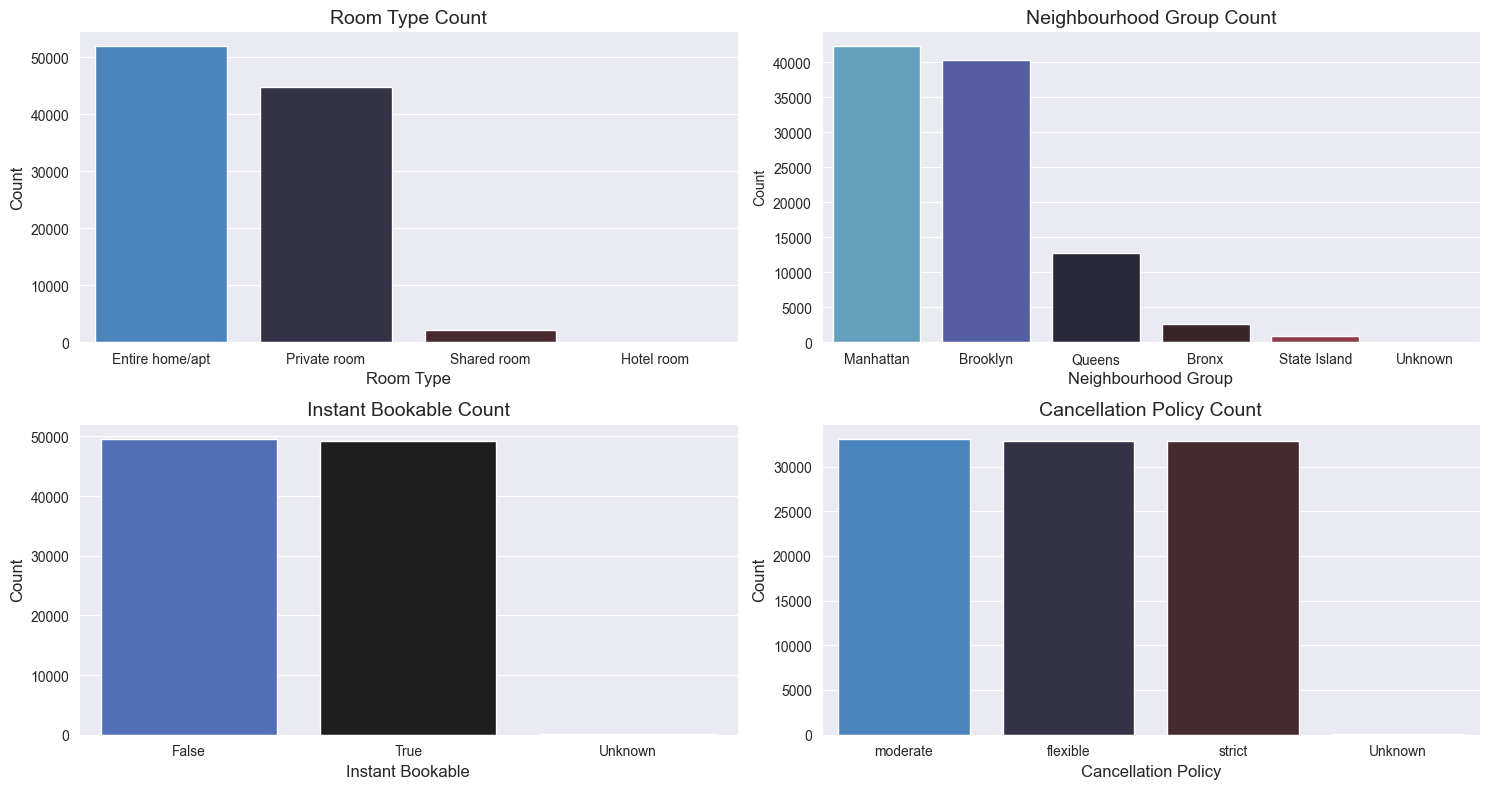

In [36]:

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Room Type Count
sns.set_style("darkgrid")
sns.countplot(data=data, x='room_type', ax=axes[0, 0], palette='icefire',order=data['room_type'].value_counts().index)
axes[0, 0].set_title('Room Type Count',fontsize = 14)
axes[0, 0].set_xlabel('Room Type',fontsize = 12)
axes[0, 0].set_ylabel('Count',fontsize = 12)

# Neighbourhood Group Count
sns.set_style("darkgrid")
sns.countplot(data=data, x='neighbourhood_group', ax=axes[0, 1], palette='icefire',order=data['neighbourhood_group'].value_counts().index)
axes[0, 1].set_title('Neighbourhood Group Count',fontsize = 14)
axes[0, 1].set_xlabel('Neighbourhood Group',fontsize = 12)
axes[0, 1].set_ylabel('Count')

# Instant Bookable Count
sns.set_style("darkgrid")
sns.countplot(data=data, x='instant_bookable', ax=axes[1, 0], palette='icefire',order=data['instant_bookable'].value_counts().index)
axes[1, 0].set_title('Instant Bookable Count',fontsize = 14)
axes[1, 0].set_xlabel('Instant Bookable',fontsize = 12)
axes[1, 0].set_ylabel('Count',fontsize = 12)

# Cancellation Policy Count
sns.set_style("darkgrid")
sns.countplot(data=data, x='cancellation_policy', ax=axes[1, 1], palette='icefire',order=data['cancellation_policy'].value_counts().index)
axes[1, 1].set_title('Cancellation Policy Count',fontsize = 14)
axes[1, 1].set_xlabel('Cancellation Policy',fontsize = 12)
axes[1, 1].set_ylabel('Count',fontsize = 12)

plt.tight_layout()
plt.show()


Room Type with there Cancellation Policy

In [37]:
#  Rooms with cancellation Policy
room_cancellation_policy = data.groupby('room_type')['cancellation_policy'].value_counts()

def count_percentage(counts):
    total = counts.sum()
    percentages = (counts / total * 100).round(2)
    formatted_percentage = percentages.astype(str)
    result_df = pd.concat([counts, formatted_percentage], axis=1)
    result_df.columns = ['Value Count', 'Percentage']
    return result_df

# Print results with color highlighting
print(f"{Fore.BLUE}Number of Rooms with there Cancellation Policy is:\n{Style.RESET_ALL}{count_percentage(room_cancellation_policy)}")


Number of Rooms with there Cancellation Policy is:
                                     Value Count Percentage
room_type       cancellation_policy                        
Entire home/apt flexible                   17335      17.51
                moderate                   17314      17.49
                strict                     17214      17.39
                Unknown                       50       0.05
Hotel room      flexible                      44       0.04
                moderate                      37       0.04
                strict                        34       0.03
Private room    moderate                   15072      15.23
                strict                     14906      15.06
                flexible                   14802      14.96
                Unknown                       23       0.02
Shared room     strict                       717       0.72
                moderate                     713       0.72
                flexible                     711 

Average Price of Neigbourhood and Average price for each Room Type

In [38]:
## Average Price of Rooms in Neighbourhood Regions
avg_price_neighbourhood = data.groupby('neighbourhood_group')['price_in_$'].mean().sort_values(ascending=False).to_frame()
## Round off to 2 Decimal places
avg_price_neighbourhood['price_in_$'] = avg_price_neighbourhood['price_in_$'].round(2)
print(f"{Fore.BLUE}Average Price in Neighbourhood Group is:\n{Style.RESET_ALL}{avg_price_neighbourhood}")

## Average Price of Rooms
avg_price_room = data.groupby('room_type')['price_in_$'].mean().sort_values(ascending=False).to_frame()
## Round off to 2 Decimal places
avg_price_room['price_in_$'] = avg_price_room['price_in_$'].round(2)
print(f"{Fore.BLUE}Average Price per Room Type:\n{Style.RESET_ALL}{avg_price_room}")



Average Price in Neighbourhood Group is:
                     price_in_$
neighbourhood_group            
Unknown                  657.17
Queens                   629.61
State Island             627.27
Bronx                    626.86
Brooklyn                 626.46
Manhattan                622.71
Average Price per Room Type:
                 price_in_$
room_type                  
Hotel room           666.39
Shared room          632.26
Entire home/apt      625.30
Private room         624.85


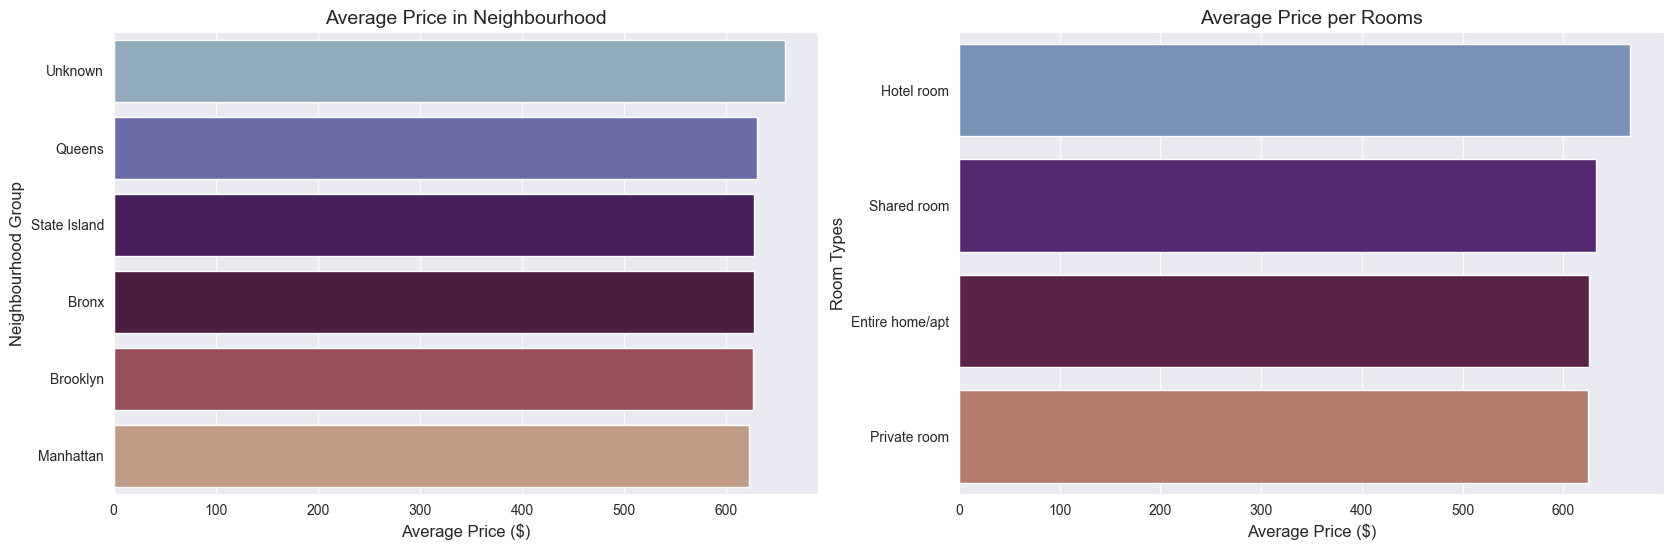

<Figure size 1000x500 with 0 Axes>

In [41]:
#Subplot for Average Price
fig, axes = plt.subplots(1,2,figsize = (20,6))

#Plotting
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
#Barplot for Average Price in Neighbourhood Group
sns.barplot(data = avg_price_neighbourhood,x = 'price_in_$',y = 'neighbourhood_group', ax = axes[0], palette='twilight')
axes[0].set_title("Average Price in Neighbourhood",fontsize = 14)
axes[0].set_xlabel("Average Price ($)",fontsize = 12)
axes[0].set_ylabel('Neighbourhood Group',fontsize = 12)


#Barplot for Average Price per Rooms
sns.barplot(data = avg_price_room,x = 'price_in_$',y = 'room_type', ax = axes[1], palette='twilight')
axes[1].set_title("Average Price per Rooms",fontsize = 14)
axes[1].set_xlabel("Average Price ($)",fontsize = 12)
axes[1].set_ylabel('Room Types',fontsize = 12)


plt.tight_layout()
plt.show()


Average Service Price in ($) for Neighbourhood Group and Rooms

In [42]:
## Average Service Price of Rooms in Neighbourhood Regions
service_price_neighbourhood_group = data.groupby('neighbourhood_group')['service_fee_in_$'].mean().sort_values(ascending=False)

#Converting to Dataframe
service_price_neighbourhood_group_df = service_price_neighbourhood_group.reset_index()
service_price_neighbourhood_group_df.columns = ['Neighbourhood_group','service_fee_in_$']
# Round off to 2 decimal places
service_price_neighbourhood_group_df['service_fee_in_$'] = service_price_neighbourhood_group_df['service_fee_in_$'].round(2)
print(f"{Fore.BLUE}Average Service Price in Neighbourhood Group is:\n{Style.RESET_ALL}{service_price_neighbourhood_group_df}")




## Average Service Price of Rooms
service_price_room = data.groupby('room_type')['service_fee_in_$'].mean().sort_values(ascending=False)
# Converting to Dataframe
service_price_room_df = service_price_room.reset_index()
service_price_room_df.columns = ['Room_type','service_fee_in_$']
# Round off to 2 Decimal places
service_price_room_df['service_fee_in_$'] = service_price_room_df['service_fee_in_$'].round(2)
print(f"{Fore.BLUE}Average Service Price per Room Type:\n{Style.RESET_ALL}{service_price_room_df}")



Average Service Price in Neighbourhood Group is:
  Neighbourhood_group  service_fee_in_$
0             Unknown            131.24
1              Queens            125.93
2        State Island            125.43
3               Bronx            125.26
4            Brooklyn            125.23
5           Manhattan            124.53
Average Service Price per Room Type:
         Room_type  service_fee_in_$
0       Hotel room            132.17
1      Shared room            126.52
2  Entire home/apt            125.01
3     Private room            124.95


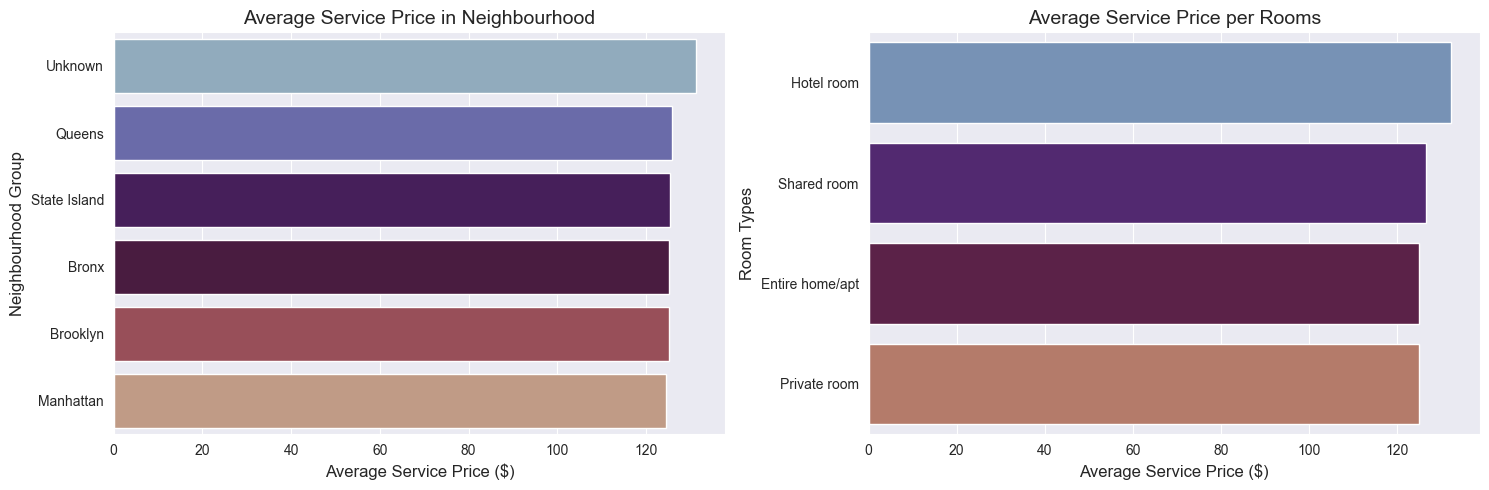

In [45]:
#Subplot for Average Price
fig, axes = plt.subplots(1,2,figsize = (15,5))

#Plotting
sns.set_style('darkgrid')
#Barplot for Average Service Price in Neighbourhood Group
sns.barplot(data = service_price_neighbourhood_group_df,x = 'service_fee_in_$',y = 'Neighbourhood_group', ax = axes[0], palette='twilight')
axes[0].set_title("Average Service Price in Neighbourhood",fontsize = 14)
axes[0].set_xlabel("Average Service Price ($)",fontsize = 12)
axes[0].set_ylabel('Neighbourhood Group',fontsize = 12)


#Barplot for Average Service Price per Rooms
sns.barplot(data = service_price_room_df,x = 'service_fee_in_$',y = 'Room_type', ax = axes[1], palette='twilight')
axes[1].set_title("Average Service Price per Rooms",fontsize = 14)
axes[1].set_xlabel("Average Service Price ($)",fontsize = 12)
axes[1].set_ylabel('Room Types',fontsize = 12)


plt.tight_layout()
plt.show()


Average Price in each Construction Year

In [46]:
# Relation Between prices and Construction Year
price_per_year = data.groupby('construction_year')['price_in_$'].mean()

# Convert to DataFrame
price_per_year_df = price_per_year.reset_index().rename(columns={'construction_year': 'construction_year', 'price_in_$': 'price_in_$'})

print(f"{Fore.BLUE}Prices per Year: \n{Style.RESET_ALL}{price_per_year_df}")

Prices per Year: 
    construction_year  price_in_$
0                2003  623.190898
1                2004  629.984764
2                2005  621.834749
3                2006  634.870691
4                2007  624.251368
5                2008  638.967428
6                2009  619.097634
7                2010  627.257765
8                2011  626.578343
9                2012  623.481935
10               2013  618.526740
11               2014  630.322255
12               2015  616.373019
13               2016  623.852341
14               2017  629.865196
15               2018  624.534249
16               2019  612.330066
17               2020  620.637127
18               2021  630.664264
19               2022  629.070204


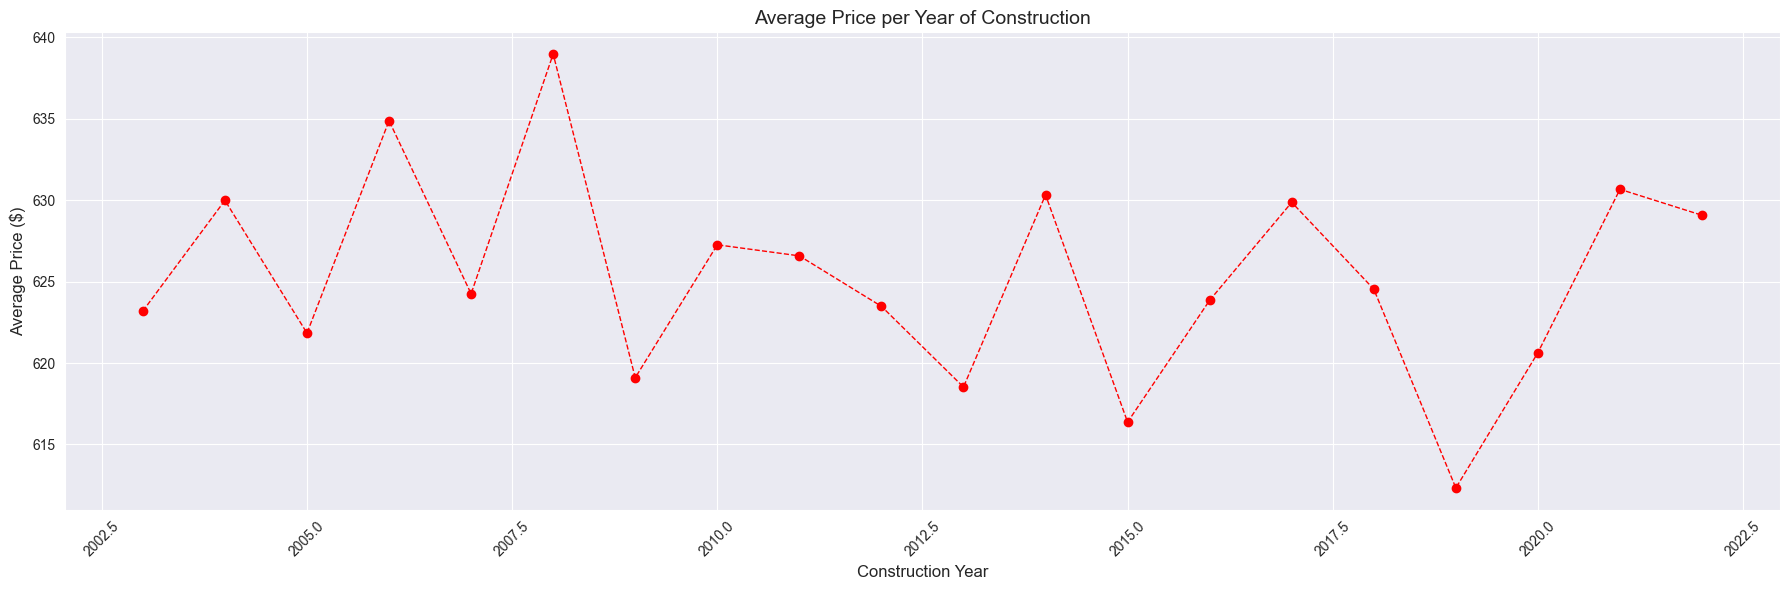

In [47]:
# Visualzing after creating Dataframe
# Plotting
plt.figure(figsize=(18, 6))
plt.plot(price_per_year_df['construction_year'], price_per_year_df['price_in_$'], marker='o', color='red', linestyle='--',linewidth = 1)
plt.title('Average Price per Year of Construction', fontsize=14)
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Number of Airbnb rentals Created in Each Year


In [48]:
construction_year_count = data['construction_year'].value_counts()

# Converting to DataFrame
construction_year_count_df = construction_year_count.reset_index()
construction_year_count_df.columns = ['Construction_Year','Number_of_Rooms_Created']
print(f"{Fore.BLUE}Number of Rooms created in Recent Years are: \n{Style.RESET_ALL}{construction_year_count_df}")

Number of Rooms created in Recent Years are: 
    Construction_Year  Number_of_Rooms_Created
0                2012                     5148
1                2014                     5055
2                2008                     5035
3                2006                     5019
4                2019                     4999
5                2020                     4999
6                2009                     4988
7                2003                     4966
8                2010                     4958
9                2022                     4957
10               2005                     4944
11               2007                     4933
12               2015                     4922
13               2017                     4896
14               2011                     4876
15               2018                     4876
16               2004                     4857
17               2021                     4855
18               2016                     4849
19            

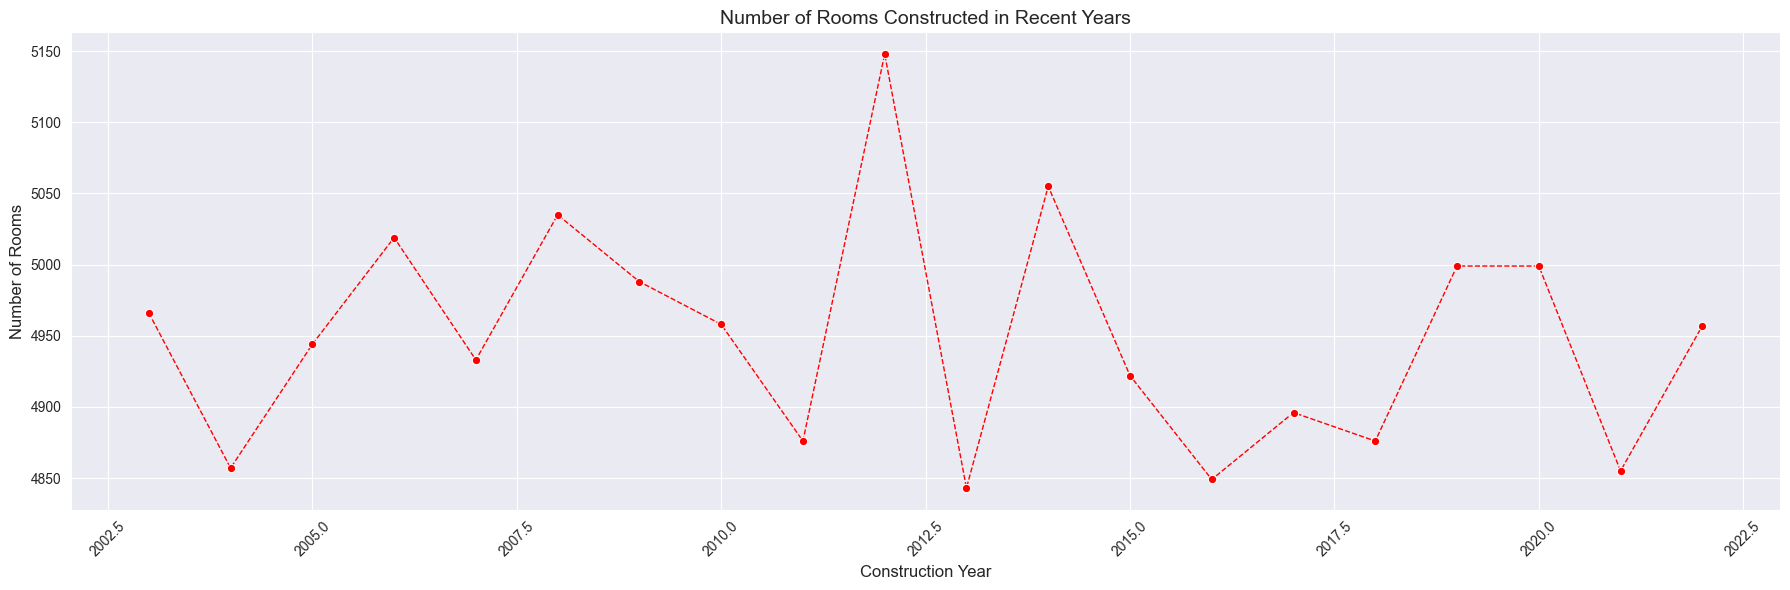

In [49]:
# Setting Plot size
plt.figure(figsize=(18,6)) 
# Plotting
sns.lineplot(data= construction_year_count_df,x = 'Construction_Year', y = 'Number_of_Rooms_Created',color = 'red',linewidth = 1,marker='o',linestyle = '--')
plt.title('Number of Rooms Constructed in Recent Years', fontsize=14)
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Rooms', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most Expensive and Most Cheapest rentals in Neighbourhood 

In [50]:
# Most Expensive Neighbourhood
expensive_neighbourhood = data.groupby('neighbourhood')['price_in_$'].mean().sort_values(ascending= False).head(20)
# Converting to DataFrame
expensive_neighbourhood_df = expensive_neighbourhood.reset_index()
expensive_neighbourhood_df.columns = ['Neighbourhood','Average_Price']
#print(f"{Fore.BLUE}Top 20 Average price in Neighbourhood:\n{Style.RESET_ALL}{expensive_neighbourhood_df}")


# Most Chepaest Neighbourhood
cheapest_neighbourhood = data.groupby('neighbourhood')['price_in_$'].mean().sort_values(ascending= True).head(20)
#converting to DataFrame
cheapest_neighbourhood_df = cheapest_neighbourhood.reset_index()
cheapest_neighbourhood_df.columns = ['Neighbourhood','Average_Price']
#print(f"{Fore.BLUE}Top 20 Average price in Neighbourhood:\n{Style.RESET_ALL}{cheapest_neighbourhood_df}")

print(f"{Fore.BLUE}Most Expensive Neighbourhood with highest Average Price for rental in ($): \n{Style.RESET_ALL}{expensive_neighbourhood_df.head(1)}")
print(f"{Fore.BLUE}Most Cheapest Neighbourhood with lowest Average Price for rental in ($): \n{Style.RESET_ALL}{cheapest_neighbourhood_df.head(1)}")

Most Expensive Neighbourhood with highest Average Price for rental in ($): 
  Neighbourhood  Average_Price
0      New Dorp    1045.333333
Most Cheapest Neighbourhood with lowest Average Price for rental in ($): 
     Neighbourhood  Average_Price
0  Lighthouse Hill     107.666667


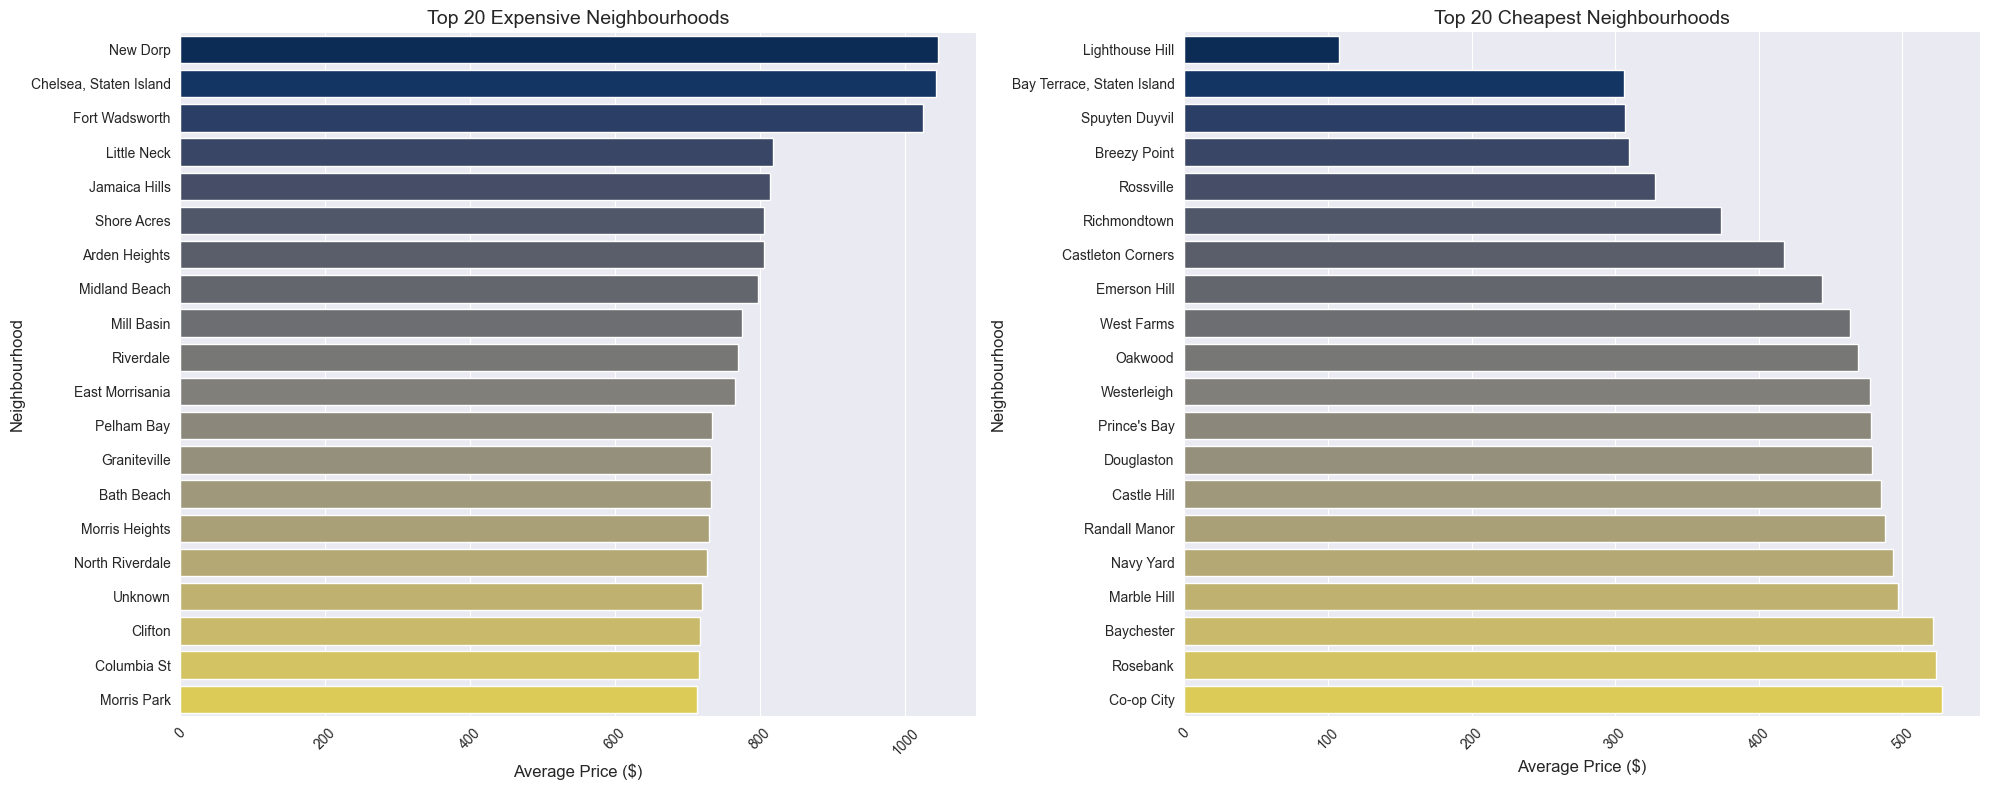

In [51]:
#Subplots
fix, axes = plt.subplots(1,2,figsize = (20,8))
sns.set_style('darkgrid')
# Plotting for Expensive Neighbourhood
sns.barplot(data = expensive_neighbourhood_df,x = 'Average_Price',y = 'Neighbourhood', ax = axes[0], palette='cividis')
axes[0].set_title('Top 20 Expensive Neighbourhoods', fontsize=14)
axes[0].set_xlabel('Average Price ($)', fontsize=12)
axes[0].set_ylabel('Neighbourhood', fontsize=12)
axes[0].tick_params(axis = 'x', rotation = 45)

# Plotting for Cheapest Neighbourhood
plt.subplot(1,2,2)
sns.barplot(data = cheapest_neighbourhood_df,x = 'Average_Price',y = 'Neighbourhood', palette='cividis',ax = axes[1])
axes[1].set_title('Top 20 Cheapest Neighbourhoods', fontsize=14)
axes[1].set_xlabel('Average Price ($)', fontsize=12)
axes[1].set_ylabel('Neighbourhood', fontsize=12)
axes[1].tick_params(axis = 'x', rotation = 45)

#Plotting
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()



Most Expensive and Cheapest Service Fee of rentals in Neighbourhood

In [52]:
# Average service price for each Neighbourhood
service_price_neighbourhood = data.groupby('neighbourhood')['service_fee_in_$'].mean().sort_values(ascending=False)

#Converting to Dataframe
service_price_neighbourhood_df = service_price_neighbourhood.reset_index()
service_price_neighbourhood_df.columns = ['Neighbourhood','Average_service_price']
# Round off to 2 Decimal places
service_price_neighbourhood_df['Average_service_price'] = service_price_neighbourhood_df['Average_service_price'].round(2)

print(f"{Fore.BLUE} Top 10 Average Service Price for Neighbourhood: \n{Style.RESET_ALL}{service_price_neighbourhood_df.head(10)}")


 Top 10 Average Service Price for Neighbourhood: 
            Neighbourhood  Average_service_price
0                New Dorp                 209.33
1  Chelsea, Staten Island                 208.00
2          Fort Wadsworth                 205.00
3             Little Neck                 163.50
4           Jamaica Hills                 162.57
5             Shore Acres                 161.00
6           Arden Heights                 161.00
7           Midland Beach                 159.18
8              Mill Basin                 155.14
9               Riverdale                 153.84


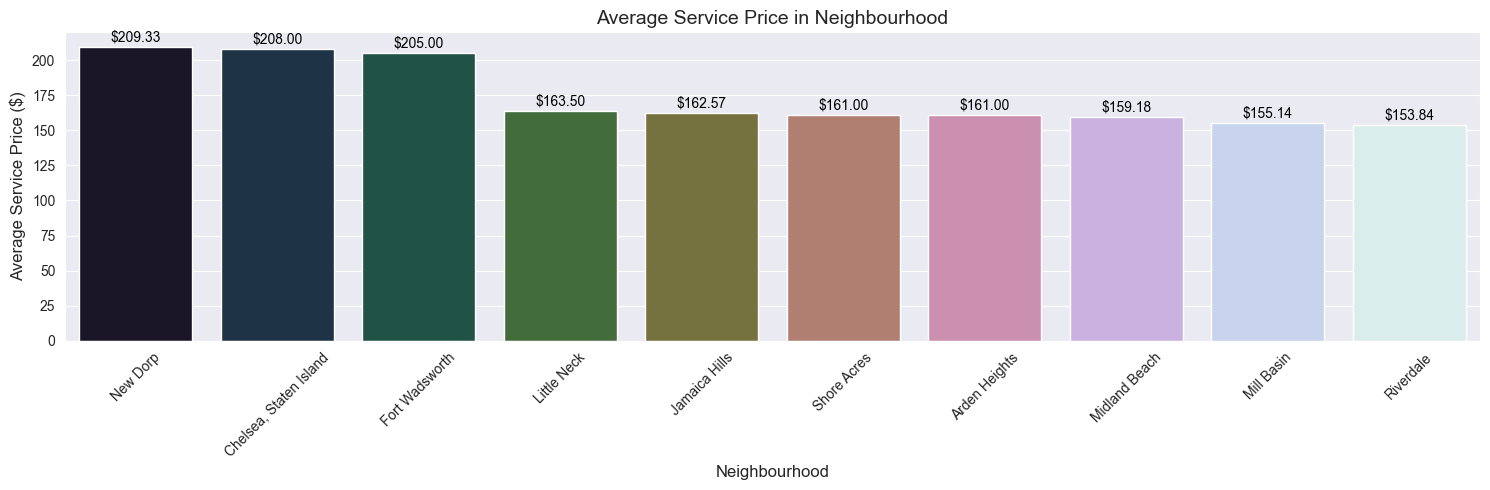

In [53]:
# Visualizing Top 10 Neighbourhood Average Service price using pie plot

#Plotting
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
#Barplot for Average Service Price in Neighbourhood
ax = sns.barplot(data = service_price_neighbourhood_df.head(10),x = 'Neighbourhood',y = 'Average_service_price', palette='cubehelix')

# Annotations
for i, count in enumerate(service_price_neighbourhood_df['Average_service_price'].head(10)):
    ax.text(i, count + 4, f"${count:.2f}", color='black', ha="center")

plt.title("Average Service Price in Neighbourhood",fontsize = 14)
plt.xlabel('Neighbourhood',fontsize = 12)
plt.ylabel("Average Service Price ($)",fontsize = 12)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()



Top 15 Short time Rentals in Neighbourhood

In [60]:
#Finding top 15 rentals providing minimum number of stays
neighbourhood_short_rentals_count = data[data['minimum_nights'] <= 2]['neighbourhood'].value_counts().head(15)

# Converting to Dataframe
neighbourhood_short_rentals_count_df = neighbourhood_short_rentals_count.reset_index()
neighbourhood_short_rentals_count_df.columns = ['Neighbourhood','Count']
print(f"{Fore.BLUE}Top 15 Neighbourhood providing short time rentals i.e. minimum 2 night Stay: \n{Style.RESET_ALL}{neighbourhood_short_rentals_count_df}")

Top 15 Neighbourhood providing short time rentals i.e. minimum 2 night Stay: 
         Neighbourhood  Count
0   Bedford-Stuyvesant   3717
1         Williamsburg   3307
2               Harlem   2515
3             Bushwick   2412
4       Hell's Kitchen   1676
5         East Village   1511
6        Crown Heights   1494
7      Upper West Side   1467
8              Midtown   1410
9      Upper East Side   1322
10         East Harlem   1125
11             Chelsea    934
12     Lower East Side    906
13             Astoria    903
14  Washington Heights    875


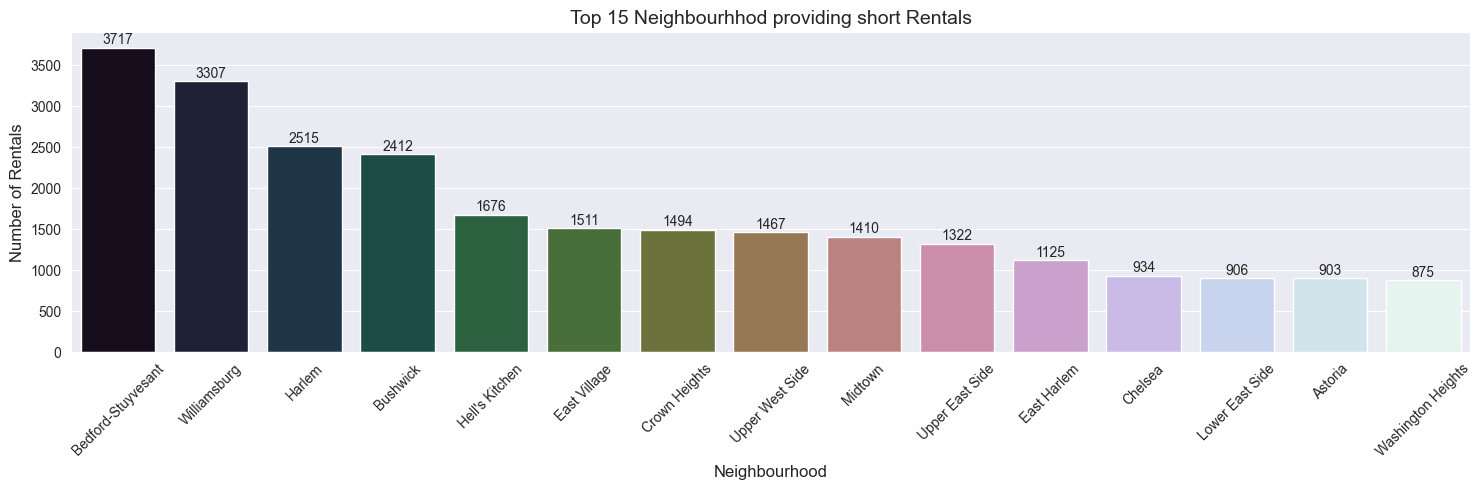

In [61]:
#Plotting
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))

#Plotting using barplot
sns.barplot(data = neighbourhood_short_rentals_count_df,x = 'Neighbourhood',y = 'Count',palette='cubehelix')

# Annotation
for i, count in enumerate(neighbourhood_short_rentals_count_df['Count']):
    plt.text(i, count + 4, str(count), ha='center', va='bottom')

plt.title('Top 15 Neighbourhhod providing short Rentals', fontsize=14)
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Number of Rentals', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()